
## Stroke Prediction Dataset
### 11 clinical features for predicting stroke events

In [176]:
# importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from dython.nominal import associations
sns.set_theme(style="whitegrid")


In [177]:
# import dataset
df = pd.read_csv("stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [178]:
age_hyper = df.loc[:,["age","gender"]]
age_hyper

,age,gender
0,67.0,Male
1,61.0,Female
2,80.0,Male
3,49.0,Female
4,79.0,Female
...,...,...
5105,80.0,Female
5106,81.0,Female
5107,35.0,Female
5108,51.0,Male


In [179]:
age_hyper['age_cat'] = age_hyper.age.apply(lambda x :  "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                )

In [180]:
pivot_age = age_hyper.pivot_table(index = 'age_cat', columns='gender', values="age", aggfunc= 'count')
pivot_age

gender,Female,Male,Other
age_cat,,,
0-2,57.0,63.0,NaN
13-18,144.0,124.0,NaN
18-30,436.0,222.0,1.0
2-5,98.0,102.0,NaN
30-40,417.0,238.0,NaN
40-50,450.0,280.0,NaN
50-65,663.0,520.0,NaN
6-13,119.0,149.0,NaN
65+,610.0,417.0,NaN


<AxesSubplot:xlabel='age_cat'>

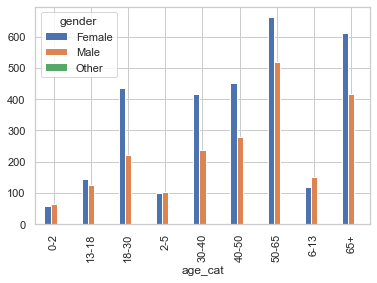

In [181]:
pivot_age.plot(kind = 'bar')

In [182]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [183]:
df.shape

(5110, 12)

In [184]:
gender_stat = df.gender.value_counts().to_frame()
gender_stat

,gender
Female,2994
Male,2115
Other,1


<AxesSubplot:ylabel='gender'>

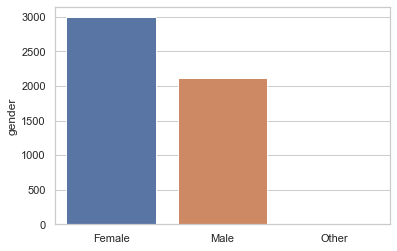

In [185]:
sns.barplot(data = gender_stat, x = gender_stat.index, y = gender_stat['gender'] )

In [186]:
# check for null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

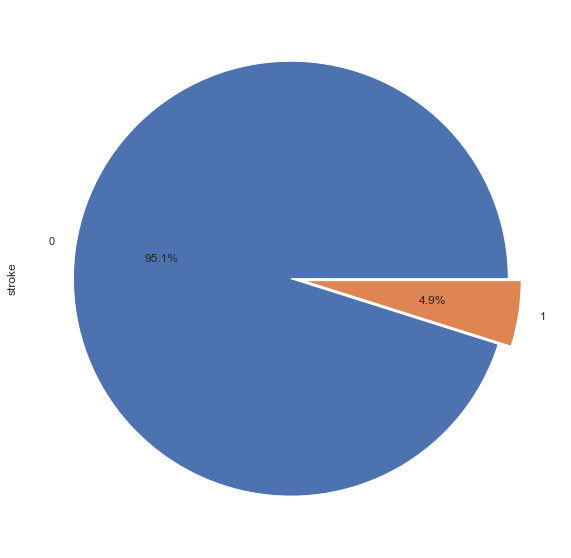

In [187]:
df.stroke.value_counts().plot(kind= "pie", autopct = "%.1f%%", figsize = (10,10), explode = (0.01,0.05));

In [188]:
df.age = df.age.astype("int")
df.bmi.fillna(df.bmi.mean(), inplace= True)

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='age'>

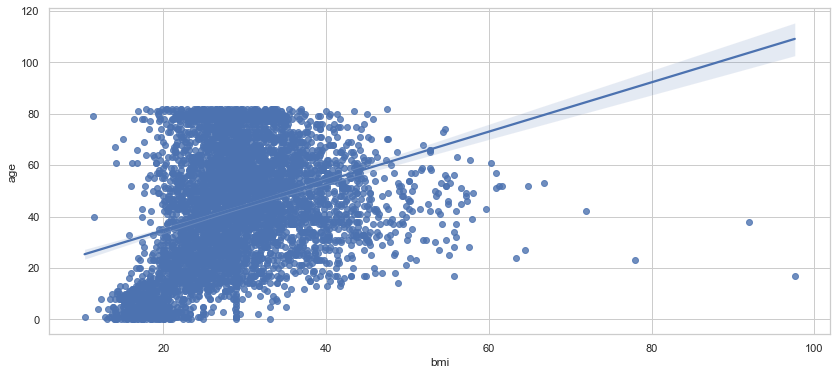

In [189]:
fig,ax =plt.subplots(figsize = (14,6))
sns.regplot(df.bmi, df.age)

<AxesSubplot:>

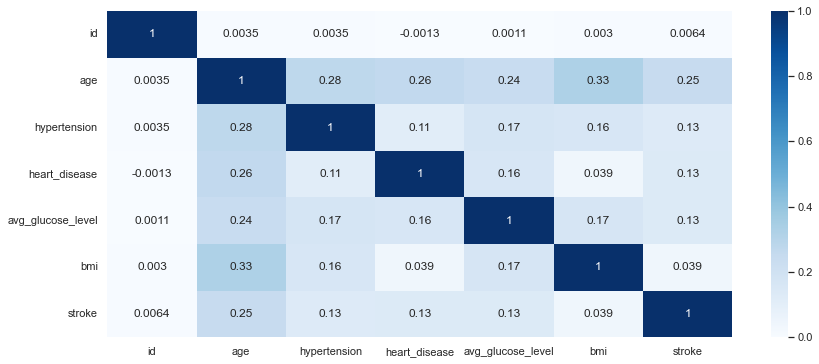

In [190]:
# feature correlation
fig,ax =plt.subplots(figsize = (14,6))
feature_check =sns.heatmap(df.corr(), cmap = "Blues", annot = True)
feature_check

## Preprocessing , change strings to numeric with OneHotEncoder

In [191]:
# splitting the dataset into X an y
X = df.drop(["id","stroke","ever_married","Residence_type"], axis =1)
y = df.stroke
X.shape, y.shape

((5110, 8), (5110,))

In [192]:
features  = list([i for i in X.columns])
print(features)

['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X[features] = X[features].apply(le.fit_transform)
X[features]

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,2,3850,240,1
1,0,61,0,0,3,3588,162,2
2,1,80,0,1,2,2483,199,2
3,0,49,0,0,2,3385,218,3
4,0,79,1,0,3,3394,113,2
...,...,...,...,...,...,...,...,...
5105,0,80,1,0,2,1360,162,2
5106,0,81,0,0,3,3030,274,2
5107,0,35,0,0,3,1314,180,2
5108,1,51,0,0,2,3363,129,1


In [205]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [206]:
from sklearn.model_selection import train_test_split , cross_val_score
X_train,X_test ,y_train ,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)  
X_train.shape ,X_test.shape  ,y_train.shape ,y_test.shape

((6805, 8), (2917, 8), (6805,), (2917,))

# Import needed estimators and libraries

In [207]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 Training -Set Accuracy score is 79.13%
 Testing - Set Accuracy score is 79.33%


              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1457
           1       0.78      0.82      0.80      1460

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



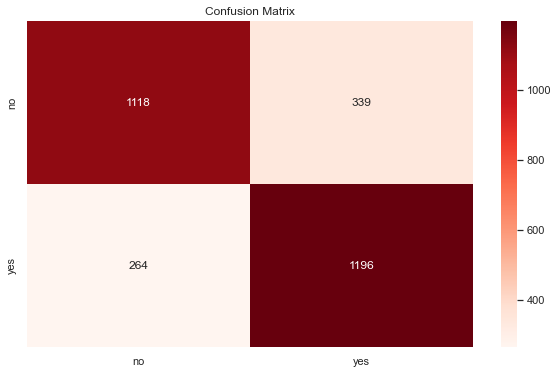

In [208]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='lbfgs', max_iter=5000, random_state = 42)
lgr.fit(X_train,y_train)
print(f' Training -Set Accuracy score is {lgr.score(X_train, y_train)*100:.2f}%')
print(f' Testing - Set Accuracy score is {lgr.score(X_test, y_test)*100:.2f}%')
y_pred1 = lgr.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)

print()
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(pd.DataFrame(cm, columns =['no',"yes"], \
    index = ["no", "yes"]),cmap = 'Reds',xticklabels = True, annot =True,fmt = "d", ax = ax)
ax.set(title ="Confusion Matrix");

print()
cr1 = classification_report(y_test, y_pred1)
print(cr1)

 Training -Set Accuracy score is 100.00%
 Testing - Set Accuracy score is 91.94%


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1457
           1       0.89      0.95      0.92      1460

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



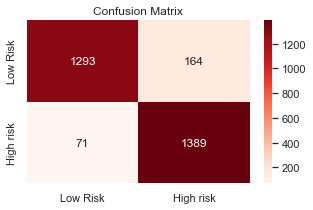

In [209]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100, n_jobs = 1 , random_state = 42)
clf.fit(X_train,y_train)

print(f' Training -Set Accuracy score is {clf.score(X_train, y_train)*100:.2f}%')
print(f' Testing - Set Accuracy score is {clf.score(X_test, y_test)*100:.2f}%')

y_pred2 = clf.predict(X_test)
confusion_mx = confusion_matrix(y_test, y_pred2)

conf_max_df = pd.DataFrame(confusion_mx, index =["Low Risk", "High risk"], columns =["Low Risk", "High risk"])

print()
fig,ax = plt.subplots(figsize = (5,3))
sns.heatmap(conf_max_df,\
cmap = 'Reds',xticklabels = True, annot =True,fmt = "d", ax = ax)
ax.set(title ="Confusion Matrix");

print()
cr2 = classification_report(y_test, y_pred2)
print(cr2)

In [210]:
conf_max_df.to_csv("conf_max_df.csv", index = False)


## Save the model

In [211]:
import pickle
pickle.dump(clf, open("estimator_pkl", "wb"))

In [212]:
import joblib
joblib.dump(clf,"estimator_joblib")

['estimator_joblib']

In [213]:
load_j = joblib.load("estimator_joblib")
load_j

RandomForestClassifier(n_jobs=1, random_state=42)

In [216]:
y_prob = clf.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

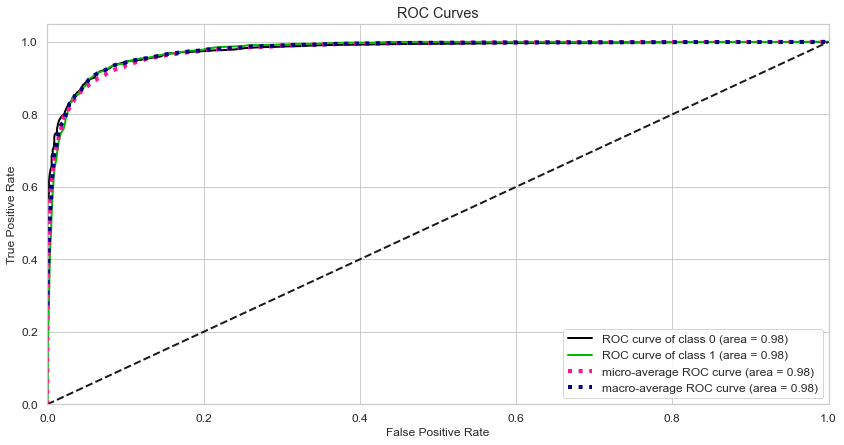

In [218]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_prob,ax= ax)

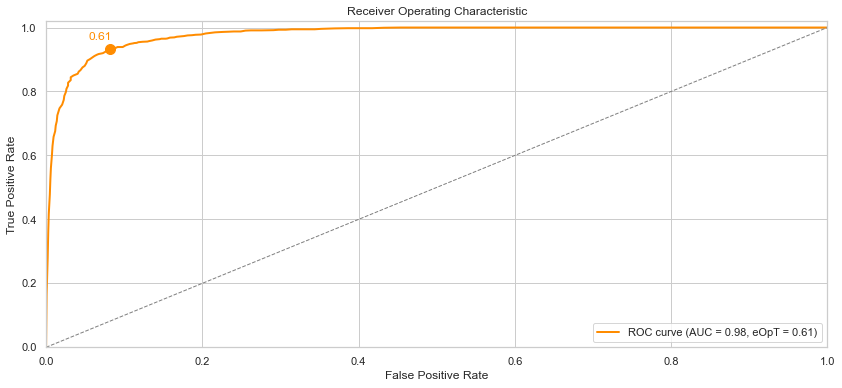

{'0': {'auc': {'val': 0.9777176314626602, 'naive': 0.5},
  'eopt': {'val': 0.61, 'x': 0.08167467398764584, 'y': 0.9328767123287671}},
 'ax': <AxesSubplot:title={'center':'Receiver Operating Characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>}

In [221]:
from dython.model_utils import metric_graph
metric_graph(y_test, y_prob[:,1], "roc", figsize = (14,6))